In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

In [68]:
def get_roadmap_filename(filename):
    road_maps_imgs = os.listdir(f"{os.getcwd()}/roadmap")
    if len(road_maps_imgs) == 0:
        return f'{filename}_00.png'
    
    if len(road_maps_imgs) == 1:
        return f'{filename}_01.png'

    last_two_elements = road_maps_imgs[-1][-6:-4]
    roadmap_num = int(last_two_elements) + 1

    return f'{filename}_{roadmap_num:02}.png'

In [65]:
get_roadmap_filename('roadmap_no_text')

01


'roadmap_no_text_02'

In [74]:
def generate_roadmap_visual(num_nodes=5, filename="roadmap_no_text.png"):
    """
    Generates a horizontal roadmap visualization based on user notes:
    - Nodes horizontally aligned.
    - Alternating curved dashed arcs between nodes.
    - Alternating vertical dashed 'counter' lines (bottom/top) from nodes,
      matching node color, ending in a numbered circle.

    Args:
        num_nodes (int): The number of milestones/nodes in the roadmap.
        filename (str, optional): The name of the file to save the image to.
                                   If None, the plot will be shown instead of saved.
    """

    # --- Configuration ---
    node_radius = 0.32
    x_spacing = 1.5     # Horizontal distance between node centers
    arc_height = 0.5    # Height of the connecting arcs (controls curvature)
    small_circle_radius = 0.07 # Radius for the small number circles
    counter_line_offset = 0.2 # Distance from main node edge to small circle edge
    node_colors = ['#6053D3', '#292263']
    arc_line_color = 'black' # Color for the connecting arcs
    line_style = '--'    # Dashed line style for arcs and counter lines
    background_color = '#E0E0E0' # Light gray background
    # Small circle edge color will match node_color
    number_color = 'white'
    number_fontsize = 10

    # --- Calculations ---
    # Main nodes are all at the same y-level
    main_node_y = 0
    x_coords = np.arange(num_nodes) * x_spacing
    y_coords_main = np.full(num_nodes, main_node_y)

    # Calculate positions for the small number circles (alternating top/bottom)
    y_coords_small = []
    for i in range(num_nodes):
        # Calculate distance from main_node_y center to small_circle center
        dist_to_small_center = node_radius + counter_line_offset + small_circle_radius

        if i % 2 == 0: # Counter line goes DOWN for even nodes (0, 2, ...)
            small_y = main_node_y - dist_to_small_center
            small_y += 0.1 * small_y
        else: # Counter line goes UP for odd nodes (1, 3, ...)
            small_y = main_node_y + dist_to_small_center
            small_y -= 0.1 * small_y
        y_coords_small.append(small_y)
    y_coords_small = np.array(y_coords_small)


    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(3 * num_nodes, 4.5)) # Adjust figsize
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)

    # 1. Draw the alternating connecting arcs (between main nodes)
    for i in range(num_nodes - 1):
        x1 = x_coords[i]
        x2 = x_coords[i+1]
        arc_center_x = (x1 + x2) / 2

        # Correlation: Even index arc (0, 2, ..) is UP ("regular"?)
        # Odd index arc (1, 3, ..) is DOWN ("flipped"?)
        # This determines which node (i.e., node 0, 2) gets the bottom counter line
        # (matching the counter line logic for node index i)
        if i % 2 == 0: # Upper arc (regular)
            theta1, theta2 = 0, 180
        else: # Lower arc (flipped)
            theta1, theta2 = 180, 360

        arc = patches.Arc((arc_center_x, main_node_y), width=x_spacing, height=arc_height,
                          angle=0, theta1=theta1, theta2=theta2,
                          color=arc_line_color, linestyle=line_style, lw=2.5, zorder=1)
        ax.add_patch(arc)

    # 2. Draw the main nodes, counter lines, and numbered circles
    for i in range(num_nodes):
        node_color = node_colors[0] if i % 2 == 0 else node_colors[1]
        
        x = x_coords[i]
        # main_y = y_coords_main[i] # which is always main_node_y
        small_y = y_coords_small[i]

        # Determine counter line direction and endpoints
        line_start_y = main_node_y
        line_end_y = small_y

        # Draw vertical dashed counter line (matching node color)
        ax.plot([x, x], [line_start_y, line_end_y],
                linestyle=line_style, color=node_color, lw=2, zorder=1)

        # Draw the main node (large circle)
        main_circle = plt.Circle((x, main_node_y), node_radius, color=node_color, zorder=2)
        ax.add_patch(main_circle)

        # Draw the small number circle (white fill, node color edge)
        small_circle = plt.Circle((x, small_y), small_circle_radius,
                                  color=node_color,
                                  edgecolor=node_color, # Edge matches node
                                  lw=1.5, # Make edge slightly thicker?
                                  zorder=3) # Ensure small circle is on top
        ax.add_patch(small_circle)

        # Add the number inside the small circle
        ax.text(x, small_y, str(i + 1), # Node number starts from 1
                ha='center', va='center', # Center the text
                fontsize=number_fontsize,
                color=number_color,
                zorder=4) # Ensure text is on top


    # --- Appearance ---
    ax.set_aspect('equal', adjustable='box') # Ensure circles are circular

    # Set plot limits with padding - adjust padding based on counter lines
    padding_x = x_spacing * 0.8
    max_abs_small_y = np.max(np.abs(y_coords_small))
    padding_y = max_abs_small_y + small_circle_radius + 0.5 # Add buffer
    ax.set_xlim(x_coords[0] - padding_x, x_coords[-1] + padding_x)
    # Center ylim vertically around main_node_y
    ax.set_ylim(main_node_y - padding_y, main_node_y + padding_y)

    # Hide axes, ticks, and spines
    ax.axis('off')

    # --- Output ---
    plt.tight_layout() # Adjust layout

    if filename:
        plt.savefig(f"roadmap/{filename}", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
        print(f"Roadmap visual saved as '{filename}'")
    else:
        plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_71572\271572041.py:97: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  small_circle = plt.Circle((x, small_y), small_circle_radius,


Roadmap visual saved as 'roadmap_no_text_05.png'


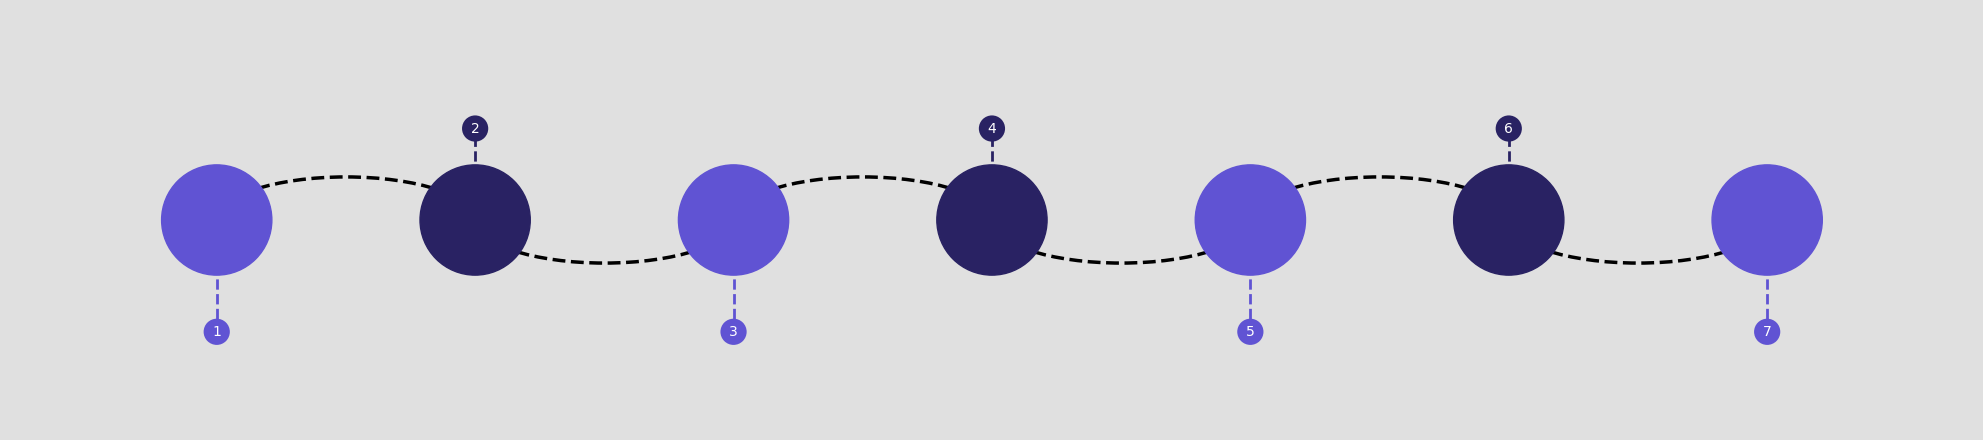

In [75]:
filename = get_roadmap_filename('roadmap_no_text')
generate_roadmap_visual(filename=filename, num_nodes=7)

- add a related symbol inside each node
- Add the events details for each node

In [76]:
def collect_user_inputs():
    pass

def get_symbol():
    pass